In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import seaborn as sns
import koreanize_matplotlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [170]:
scachi_df = pd.read_csv('Whiskey.csv',encoding='utf-8')
scachi_df.head()

,Unnamed: 0.1,Unnamed: 0,Name,Country,Brand,Categories,Tasting Notes,ABV,Base Ingredient,Years Aged,Rating,Rate Count,Price,Volume,Description
0,0,181,Jack Daniel’s Old No. 7 Tennessee Whiskey,United States,Jack Daniels,"Bourbon, Whiskey",NaN,40%,NaN,NaN,4.8,991,$24.00,750ml,Jack Daniel's Tennessee Whiskey is the world's...
1,1,182,Jack Daniel’s Tennessee Honey,United States,Jack Daniels,"Flavored Whiskey, Whiskey",NaN,35%,NaN,NaN,4.8,283,$46.93,NaN,Jack Daniel’s Tennessee Honey is a blend of Ja...
2,2,183,Jack Daniel’s Gentleman Jack Tennessee Whiskey,United States,Jack Daniels,"American Whiskey, Whiskey",NaN,40%,NaN,NaN,4.9,131,$32.99,NaN,Jack Daniel's Gentleman Jack is an exceptiona...
3,3,184,Jack Daniel’s Tennessee Fire Flavored Whiskey,United States,Jack Daniels,"Flavored Whiskey, Whiskey",NaN,35%,NaN,NaN,4.9,68,$24.99,NaN,"Jack Daniel’s Tennessee Fire delivers a rich, ..."
4,4,185,Jack Daniel’s Tennessee Apple Flavored Whiskey,United States,Jack Daniels,"Flavored Whiskey, Whiskey",NaN,35%,NaN,NaN,5.0,44,$24.99,NaN,"Highly versatile, deliciously smooth, and refr..."


In [171]:
# 필요한 컬럼만 추출
scachi_df=scachi_df.drop(['Unnamed: 0.1','Unnamed: 0','Tasting Notes','ABV','Base Ingredient','Years Aged','Volume' ],axis=1)

In [172]:
scachi_df

,Name,Country,Brand,Categories,Rating,Rate Count,Price,Description
0,Jack Daniel’s Old No. 7 Tennessee Whiskey,United States,Jack Daniels,"Bourbon, Whiskey",4.8,991,$24.00,Jack Daniel's Tennessee Whiskey is the world's...
1,Jack Daniel’s Tennessee Honey,United States,Jack Daniels,"Flavored Whiskey, Whiskey",4.8,283,$46.93,Jack Daniel’s Tennessee Honey is a blend of Ja...
2,Jack Daniel’s Gentleman Jack Tennessee Whiskey,United States,Jack Daniels,"American Whiskey, Whiskey",4.9,131,$32.99,Jack Daniel's Gentleman Jack is an exceptiona...
3,Jack Daniel’s Tennessee Fire Flavored Whiskey,United States,Jack Daniels,"Flavored Whiskey, Whiskey",4.9,68,$24.99,"Jack Daniel’s Tennessee Fire delivers a rich, ..."
4,Jack Daniel’s Tennessee Apple Flavored Whiskey,United States,Jack Daniels,"Flavored Whiskey, Whiskey",5.0,44,$24.99,"Highly versatile, deliciously smooth, and refr..."
...,...,...,...,...,...,...,...,...
4098,John Mcgil Gold Label Blended Whisky,Scotland,John McGil,"Scotch Whisky, Whiskey",5.0,1,$11.99,John McGil Gold Label is produced from the fin...
4099,Blair Athol 12 Year Old Scotch Single Cask,Scotland,Blair Athol,"Scotch Whisky, Whiskey",5.0,1,$105.25,NaN
4100,Glen Oak Aged 28 Year Old Scotch,Scotland,Glen Oak,"Scotch Whisky, Whiskey",5.0,1,$512.49,Originally distilled and laid into former bour...
4101,King William IV Scotch Whisky,Scotland,King William IV,"Scotch Whisky, Whiskey",5.0,1,$20.18,NaN


In [173]:
# 필요한  categories만 추출
category_list = ['Scotch Whisky, Whiskey' ]
scachi_df2 = scachi_df[(scachi_df['Categories'].isin(category_list))]

In [174]:
#scachi_df2 = scachi_df2.drop('index',axis=1)
scachi_df2
scachi_df2['Price']=scachi_df2['Price'].str.replace('$','')
scachi_df2['Price'] = pd.to_numeric(scachi_df2['Price'], errors='coerce')

C:\Users\KDP-17\AppData\Local\Temp\ipykernel_10356\1178801294.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scachi_df2['Price']=scachi_df2['Price'].str.replace('$','')
C:\Users\KDP-17\AppData\Local\Temp\ipykernel_10356\1178801294.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scachi_df2['Price'] = pd.to_numeric(scachi_df2['Price'], errors='coerce')


In [175]:
# 데이터 확인
scachi_df2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1118 entries, 51 to 4101
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1118 non-null   object 
 1   Country      1118 non-null   object 
 2   Brand        1118 non-null   object 
 3   Categories   1118 non-null   object 
 4   Rating       1118 non-null   float64
 5   Rate Count   1118 non-null   int64  
 6   Price        1104 non-null   float64
 7   Description  871 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 78.6+ KB


In [176]:
# rating이 5인 제품들의 description, wordcloud 출력해보기
scachi_df2_best = scachi_df2.loc[(scachi_df2['Rating'] == 5)]
scachi_df2_best_brand = scachi_df2_best.groupby('Rating')['Brand']

In [177]:
scachi_df2_best.head()

,Name,Country,Brand,Categories,Rating,Rate Count,Price,Description
58,Johnnie Walker A Song of Fire Blended Scotch W...,Scotland,Johnnie Walker,"Scotch Whisky, Whiskey",5.0,11,39.99,In celebration of the final season of Game of ...
59,Johnnie Walker Aged 18 Years Blended Scotch Wh...,Scotland,Johnnie Walker,"Scotch Whisky, Whiskey",5.0,10,89.99,Indulge all of your senses with a smooth glass...
60,Johnnie Walker Black Label The Jane Walker Edi...,Scotland,Johnnie Walker,"Scotch Whisky, Whiskey",5.0,9,38.73,Indulge all of your senses with a smooth glass...
61,Johnnie Walker A Song of Ice Blended Scotch Wh...,Scotland,Johnnie Walker,"Scotch Whisky, Whiskey",5.0,7,39.99,In celebration of the final season of Game of ...
63,Jane Walker by Johnnie Walker Blended Malt Sco...,Scotland,Johnnie Walker,"Scotch Whisky, Whiskey",5.0,4,39.99,Jane Walker by Johnnie Walker is a blended mal...


In [178]:
# Brand만 출력
scachi_df2_best['Brand'].value_counts()

Brand
Gordon  MacPhail          52
Johnnie Walker            47
Highland Park             44
Bruichladdich             32
Glenmorangie              29
                          ..
House Of Stuart Scotch     1
Scoresby                   1
Black  White               1
White Horse                1
King William IV            1
Name: count, Length: 231, dtype: int64

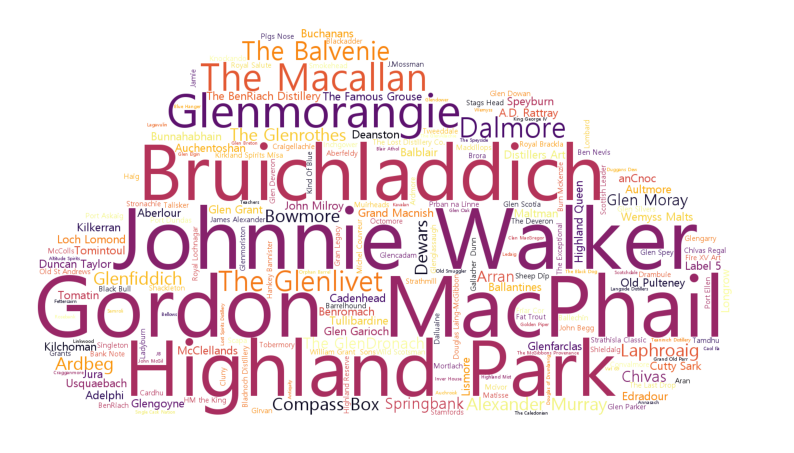

In [179]:
# rating 5점인 브랜드 순위 wordcloud 
path = r'c:\Winodos\Fonts\malgun.ttf'
img_mask=np.array(Image.open('cloud.png'))
wordcloud = WordCloud(font_path=path, width=800, height=600,
                      background_color='white', max_font_size=200,
                      repeat=True,
                      colormap='inferno', mask=img_mask)
cloud = wordcloud.generate_from_frequencies(scachi_df2_best['Brand'].value_counts())
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

In [180]:
# 가격과 rating의 관계
## 필요 컬럼 추출한 DF 만들기
scachi_df_price = scachi_df2[(scachi_df2['Price'] < 50000 )]
scachi_df_price


,Name,Country,Brand,Categories,Rating,Rate Count,Price,Description
51,Johnnie Walker Black Label Blended Scotch Whisky,Scotland,Johnnie Walker,"Scotch Whisky, Whiskey",4.8,425,31.99,Indulge all of your senses with a smooth glass...
52,Johnnie Walker Red Label Blended Scotch Whisky,Scotland,Johnnie Walker,"Scotch Whisky, Whiskey",4.8,177,39.99,Indulge all of your senses with a smooth glass...
53,Johnnie Walker Blue Label Blended Scotch Whisky,Scotland,Johnnie Walker,"Scotch Whisky, Whiskey",4.7,149,169.00,Indulge all of your senses with a smooth glass...
54,Johnnie Walker White Walker Blended Scotch Whisky,Scotland,Johnnie Walker,"Scotch Whisky, Whiskey",4.8,39,39.99,Strongly influenced by the cold white mist tha...
55,Johnnie Walker Double Black Label Blended Scot...,Scotland,Johnnie Walker,"Scotch Whisky, Whiskey",4.8,30,56.99,Indulge all of your senses with a smooth glass...
...,...,...,...,...,...,...,...,...
4097,Langside Distillers ‘Distiller’s Art’ Benrinne...,Scotland,Langside Distillers,"Scotch Whisky, Whiskey",5.0,1,76.99,NaN
4098,John Mcgil Gold Label Blended Whisky,Scotland,John McGil,"Scotch Whisky, Whiskey",5.0,1,11.99,John McGil Gold Label is produced from the fin...
4099,Blair Athol 12 Year Old Scotch Single Cask,Scotland,Blair Athol,"Scotch Whisky, Whiskey",5.0,1,105.25,NaN
4100,Glen Oak Aged 28 Year Old Scotch,Scotland,Glen Oak,"Scotch Whisky, Whiskey",5.0,1,512.49,Originally distilled and laid into former bour...


In [181]:
# 상관관계 그래프 시각화
## corr 구하기
scachi_df_price_corr = scachi_df_price.corr(numeric_only=True)


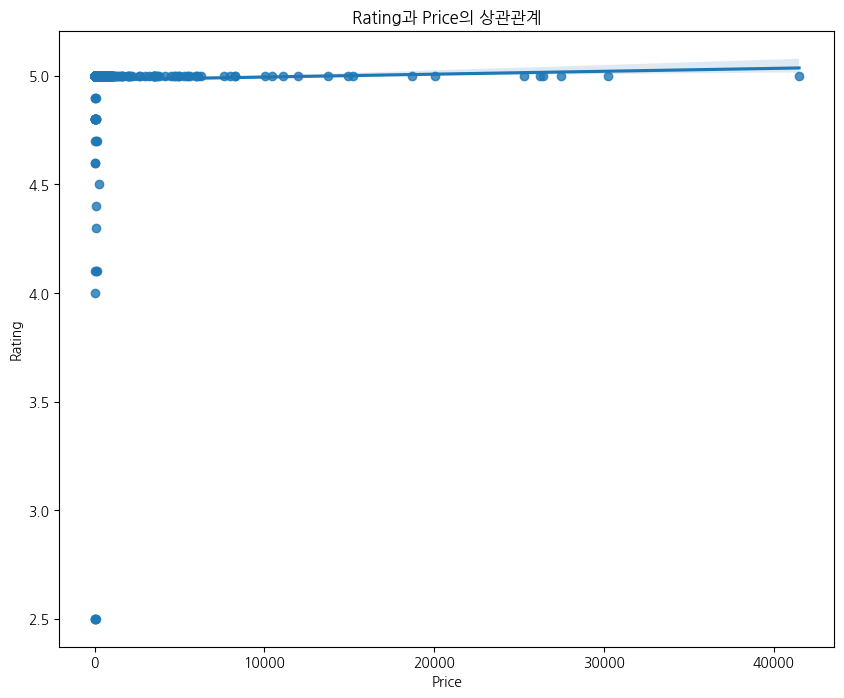

In [182]:
## 시각화
plt.figure(figsize=(10,8))
sns.regplot(x='Price',y='Rating',data=scachi_df_price)
plt.xlabel('Price')
plt.ylabel('Rating')
plt.title('Rating과 Price의 상관관계')
plt.show()

In [183]:
# 이상치를 만들어 낸 가장 비싼 가격의 술 알려주기
scachi_df2_best['Price'].max()

41499.99

In [184]:
# 이상치를 만들어 낸 가장 비싼 가격의 술 알려주기
scachi_df2_best[(scachi_df2_best['Price'] == 41499.99 )]

,Name,Country,Brand,Categories,Rating,Rate Count,Price,Description
475,The Balvenie 50 Year,United Kingdom,The Balvenie,"Scotch Whisky, Whiskey",5.0,1,41499.99,"The pinnacle of The Balvenie range, this extre..."


In [185]:
# Rating 5점인데 가격 제일 싼 술 알려주기
scachi_df2_best_min=scachi_df2_best[(scachi_df2_best['Price'] > 0)]
scachi_df2_best_min['Price'].min()
scachi_df2_best_min[(scachi_df2_best_min['Price'] == 2.01)]

,Name,Country,Brand,Categories,Rating,Rate Count,Price,Description
1503,Kirkland 24 Year,Scotland,Kirkland Spirits Misa,"Scotch Whisky, Whiskey",5.0,1,2.01,Brilliant golden amber color. Toasty aromas an...


In [186]:
scachi_df2_copy = scachi_df2.copy()
scachi_df2_copy

,Name,Country,Brand,Categories,Rating,Rate Count,Price,Description
51,Johnnie Walker Black Label Blended Scotch Whisky,Scotland,Johnnie Walker,"Scotch Whisky, Whiskey",4.8,425,31.99,Indulge all of your senses with a smooth glass...
52,Johnnie Walker Red Label Blended Scotch Whisky,Scotland,Johnnie Walker,"Scotch Whisky, Whiskey",4.8,177,39.99,Indulge all of your senses with a smooth glass...
53,Johnnie Walker Blue Label Blended Scotch Whisky,Scotland,Johnnie Walker,"Scotch Whisky, Whiskey",4.7,149,169.00,Indulge all of your senses with a smooth glass...
54,Johnnie Walker White Walker Blended Scotch Whisky,Scotland,Johnnie Walker,"Scotch Whisky, Whiskey",4.8,39,39.99,Strongly influenced by the cold white mist tha...
55,Johnnie Walker Double Black Label Blended Scot...,Scotland,Johnnie Walker,"Scotch Whisky, Whiskey",4.8,30,56.99,Indulge all of your senses with a smooth glass...
...,...,...,...,...,...,...,...,...
4097,Langside Distillers ‘Distiller’s Art’ Benrinne...,Scotland,Langside Distillers,"Scotch Whisky, Whiskey",5.0,1,76.99,NaN
4098,John Mcgil Gold Label Blended Whisky,Scotland,John McGil,"Scotch Whisky, Whiskey",5.0,1,11.99,John McGil Gold Label is produced from the fin...
4099,Blair Athol 12 Year Old Scotch Single Cask,Scotland,Blair Athol,"Scotch Whisky, Whiskey",5.0,1,105.25,NaN
4100,Glen Oak Aged 28 Year Old Scotch,Scotland,Glen Oak,"Scotch Whisky, Whiskey",5.0,1,512.49,Originally distilled and laid into former bour...


In [187]:
scachi_df2_copy = scachi_df2_copy.dropna(subset=['Price'])


In [190]:
# scachi_df2_copy[scachi_df2_copy['Price']]

KeyError: "None of [Index([ 31.99,  39.99,  169.0,  39.99,  56.99,  77.95,  98.22,  39.99,  89.99,\n        38.73,\n       ...\n        14.99,  18.76, 229.99,  54.99,  59.99,  76.99,  11.99, 105.25, 512.49,\n        20.18],\n      dtype='float64', length=1104)] are in the [columns]"

In [191]:
X = scachi_df2_copy[['Rate Count','Price']]
y = scachi_df2_copy['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R² Score: {r2:.2f}')

Mean Absolute Error (MAE): 0.03
Mean Squared Error (MSE): 0.03
R² Score: 0.01
